### **Exercise 11.3**

Estendiamo ora il modello per fittare una funzione trigonometrica con variabile bidimensionale come: 

$$f(x,y) = \sin(x^2+y^2) \hspace{0.6cm} (x,y) \in [-1.5,1.5] \times [-1.5,1.5]$$

##### **Definizione dei dati e della rete neurale**
Per affrontare questo problema, utilizzo la stessa architettura della rete neurale adottata nell’esercizio precedente, modificando unicamente il set di dati di training e validazione.

Come evidenziato di seguito, rispetto all’esercizio 11.2 ho aumentato il numero di punti nel campione di training a 15000. Campioni di dimensioni inferiori si sono rivelati insufficienti per cogliere adeguatamente le variazioni della superficie target, portando a una scarsa capacità del modello di approssimare correttamente la funzione.

Ho infine ridotto il numero di epoche a 10, sufficienti per garantire la convergenza del modello, riducendo in questo modo il tempo di addestramento, che era aumentato a causa dell'ampliamento del campione di training.

Definiamo dunque i set di dati, costruiamo e alleniamo la rete neurale, ottenendo dei buoni risultati: la rete neurale riesce a predire la funzione con una buona accuratezza, compresi anche i punti di massimo che mi sarei aspettato fossero i più problematici.

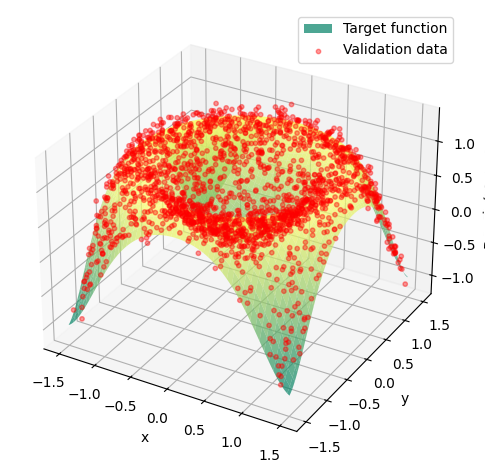

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D  # necessario per i plot 3D

# === PARAMETRI ===
N_train = 15000
N_valid = 2000
N_epochs = 10
sigma = 0.1  # noise standard deviation
def f(x):
    return np.sin(x[:, 0]**2 + x[:, 1]**2)

np.random.seed(0)
tf.random.set_seed(0)
x_train = np.random.uniform(-1.5, 1.5, size=(N_train, 2))
x_valid = np.random.uniform(-1.5, 1.5, size=(N_valid, 2))
z_target = f(x=x_train)

z_train = np.random.normal(f(x=x_train), sigma)
z_valid = np.random.normal(f(x=x_valid), sigma)

grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_z = np.sin(grid_x**2 + grid_y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z, cmap='summer', alpha=0.7, edgecolor='none', label='Target function')

ax.scatter(x_valid[:, 0], x_valid[:, 1], z_valid, color='red', s=10, alpha=0.4, label='Validation data')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z = sin(x² + y²)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [6]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='linear')) 
# La ReLU impone che l'output sia ≥ 0 (i valori negativi sono messi a zero), 
# quindi la rete non può imparare i valori negativi della funzione sin(x² + y²).

model.compile(optimizer='adam', loss='mse', metrics=['mse']) 
model.summary()
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, z_valid))

print()
print("=== RESULTS ===")
print()
# evaluate model
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
print("TEST DATA EVAL  ", "\t", 'Test loss:', score[0])
# evaluate model with the exact curve
score = model.evaluate(x_valid, z_valid, batch_size=32, verbose=0)
print("EXACT CURVE EVAL", "\t", 'Test loss:', score[0])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1844 - mse: 0.1844 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0270 - val_mse: 0.0270
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step


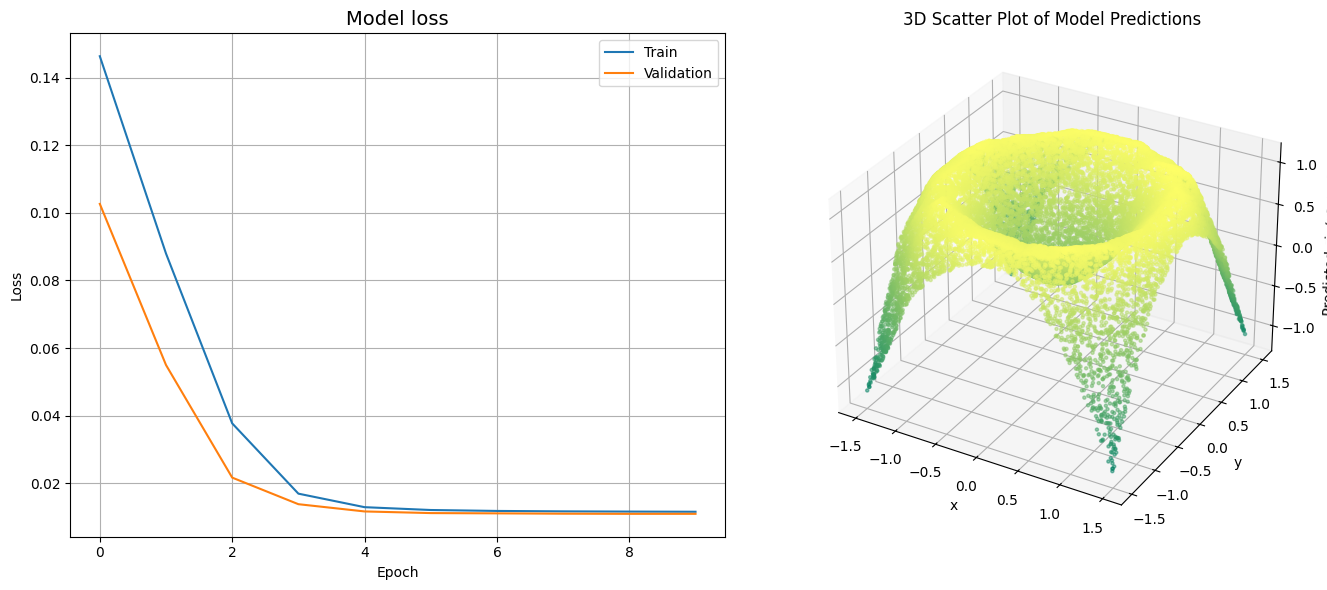

In [3]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss', fontsize=14)
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='best')
ax1.grid(True)

x_predicted = np.random.uniform(-1.5, 1.5, size=(20000, 2))
z_predicted = model.predict(x_predicted).ravel()
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(x_predicted[:, 0], x_predicted[:, 1], z_predicted, c=z_predicted, cmap='summer', s=5, alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Predicted sin(x² + y²)')
ax2.set_title('3D Scatter Plot of Model Predictions')

plt.tight_layout()
plt.show()